# Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PowerTransformer
import warnings
warnings.filterwarnings('ignore')
# %matplotlib inline


# Loading .xls

In [10]:
who = pd.read_csv('../data/Life_Expectancy_Data.xls')

In [11]:
who.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


# Checking size of data frame (columns + rows)

In [12]:
len(who.columns)

22

In [13]:
len(who.index)

2938

# Checking for data types

In [14]:
who.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

# Checking amount of NaN's

In [15]:
nulls_df = pd.DataFrame(round(who.isna().sum()/len(who),4)*100)
nulls_df = nulls_df.reset_index()
nulls_df.columns = ['header_name', 'percent_nulls']
nulls_df

,header_name,percent_nulls
0,Country,0.00
1,Year,0.00
2,Status,0.00
3,Life expectancy,0.34
4,Adult Mortality,0.34
5,infant deaths,0.00
6,Alcohol,6.60
7,percentage expenditure,0.00
8,Hepatitis B,18.82
9,Measles,0.00


# Replacing NaN with median

In [ ]:
# who = who.fillna(who.median()) #, inplace=True

TypeError: Cannot convert [['Afghanistan' 'Afghanistan' 'Afghanistan' ... 'Zimbabwe' 'Zimbabwe'
  'Zimbabwe']
 ['Developing' 'Developing' 'Developing' ... 'Developing' 'Developing'
  'Developing']] to numeric

In [ ]:
nulls_df = pd.DataFrame(round(who.isna().sum()/len(who),4)*100)
nulls_df = nulls_df.reset_index()
nulls_df.columns = ['header_name', 'percent_nulls']
nulls_df

,header_name,percent_nulls
0,Country,0.0
1,Year,0.0
2,Status,0.0
3,Life expectancy,0.0
4,Adult Mortality,0.0
5,infant deaths,0.0
6,Alcohol,0.0
7,percentage expenditure,0.0
8,Hepatitis B,0.0
9,Measles,0.0


# Dropping duplicates

In [ ]:
who = who.drop_duplicates()

# Checking for column uniform names

In [ ]:
who.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

# Standardizing column names

In [ ]:
who = who.rename(columns={'Life expectancy ' : 'life expectancy'}) #, inplace=True

In [ ]:
who = who.rename(columns={'Measles '  : 'measles'}) #, inplace=True

In [ ]:
who = who.rename(columns={' BMI ' : 'bmi'}) #, inplace=True

In [ ]:
who = who.rename(columns={'under-five deaths ' : 'under-five deaths'}) #, inplace=True

In [ ]:
who = who.rename(columns={'Diphtheria ' : 'diphtheria'}) #, inplace=True

In [ ]:
who = who.rename(columns={' HIV/AIDS' : 'hiv/aids'}) #, inplace=True

In [ ]:
who = who.rename(columns={' thinness  1-19 years' : 'thinness 1-19 years'}) #, inplace=True

In [ ]:
who = who.rename(columns={' thinness 5-9 years' : 'thinness 5-9 years'}) #, inplace=True

In [ ]:
who.columns= who.columns.str.lower()

In [ ]:
who.columns

Index(['country', 'year', 'status', 'life expectancy', 'adult mortality',
       'infant deaths', 'alcohol', 'percentage expenditure', 'hepatitis b',
       'measles', 'bmi', 'under-five deaths', 'polio', 'total expenditure',
       'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness 1-19 years',
       'thinness 5-9 years', 'income composition of resources', 'schooling'],
      dtype='object')

# Standardizing country names

In [ ]:
who['country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', "Côte d'Ivoire", 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Canada', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo',
       'Cook Islands', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia',
       'Georgia', 'Germany'

In [ ]:
who.replace('Brunei Darussalam', 'Brunei', inplace=True)

In [ ]:
who.replace('Bolivia (Plurinational State of)', 'Bolivia', inplace=True)

In [ ]:
who.replace('Cabo Verde', 'Cape Verde', inplace=True)

In [ ]:
who.replace("Democratic People's Republic of Korea", "North Korea", inplace=True)

In [ ]:
who.replace("Democratic Republic of the Congo", "Congo", inplace=True)

In [ ]:
who.replace('Iran (Islamic Republic of)', 'Iran', inplace=True)

In [ ]:
who.replace("Lao People's Democratic Republic", "Laos", inplace=True)

In [ ]:
who.replace("Micronesia (Federated States of)", "Micronesia", inplace=True)

In [ ]:
who.replace("Republic of Korea", "South Republic of Korea", inplace=True)

In [ ]:
who.replace("Republic of Moldova", "Moldova", inplace=True)

In [ ]:
who.replace("Russian Federation", "Russia", inplace=True)

In [ ]:
who.replace("Syrian Arab Republic", "Syria", inplace=True)

In [ ]:
who.replace("The former Yugoslav republic of Macedonia", "Macedonia", inplace=True)

In [ ]:
who.replace("United Kingdom of Great Britain and Northern Ireland", "United Kingdom", inplace=True)

In [ ]:
who.replace("United Republic of Tanzania", "Tanzania", inplace=True)

In [ ]:
who.replace("United States of America", "America", inplace=True)

In [ ]:
who.replace("America", "United States", inplace=True)

In [ ]:
who.replace("Venezuela (Bolivarian Republic of)", "Venezuela", inplace=True)

In [ ]:
who.replace("Viet Nam", "Vietnam", inplace=True)

In [ ]:
who['country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', "Côte d'Ivoire",
       'Cape Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', 'Croatia',
       'Cuba', 'Cyprus', 'Czechia', 'North Korea', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia',
       'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala',
       'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras',
  

# Hot Coding coding developmental status

In [ ]:
who['status'].unique()

array(['Developing', 'Developed'], dtype=object)

In [ ]:
hc_status = pd.get_dummies(who[['status']], drop_first=True)

In [ ]:
hc_status

,status_Developing
0,1
1,1
2,1
3,1
4,1
...,...
2933,1
2934,1
2935,1
2936,1


In [ ]:
hc_status['status_Developing'].unique()

array([1, 0], dtype=uint8)

In [ ]:
who['status'] = hc_status['status_Developing']

# Groupby averaging countries

In [ ]:
# grouping by country as to avoid e.g. 2000-2020 =  20x Brazil, mean deletes status as it is categorical

who = who.groupby('country', as_index=False).mean()

In [ ]:
who.columns

Index(['country', 'year', 'status', 'life expectancy', 'adult mortality',
       'infant deaths', 'alcohol', 'percentage expenditure', 'hepatitis b',
       'measles', 'bmi', 'under-five deaths', 'polio', 'total expenditure',
       'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness 1-19 years',
       'thinness 5-9 years', 'income composition of resources', 'schooling'],
      dtype='object')

In [ ]:
who = who.drop(['year'], axis = 1)

In [ ]:
who['status'].unique()

array([1., 0.])

# Pairplot for pairwise feature correlation

In [ ]:
# sns.pairplot(who)


# Histograms for distribution of numerical features

array([[<AxesSubplot:title={'center':'status'}>,
        <AxesSubplot:title={'center':'life expectancy'}>,
        <AxesSubplot:title={'center':'adult mortality'}>,
        <AxesSubplot:title={'center':'infant deaths'}>],
       [<AxesSubplot:title={'center':'alcohol'}>,
        <AxesSubplot:title={'center':'percentage expenditure'}>,
        <AxesSubplot:title={'center':'hepatitis b'}>,
        <AxesSubplot:title={'center':'measles'}>],
       [<AxesSubplot:title={'center':'bmi'}>,
        <AxesSubplot:title={'center':'under-five deaths'}>,
        <AxesSubplot:title={'center':'polio'}>,
        <AxesSubplot:title={'center':'total expenditure'}>],
       [<AxesSubplot:title={'center':'diphtheria'}>,
        <AxesSubplot:title={'center':'hiv/aids'}>,
        <AxesSubplot:title={'center':'gdp'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'thinness 1-19 years'}>,
        <AxesSubplot:title={'center':'thinness 5-9 years'}>,
        <AxesSub

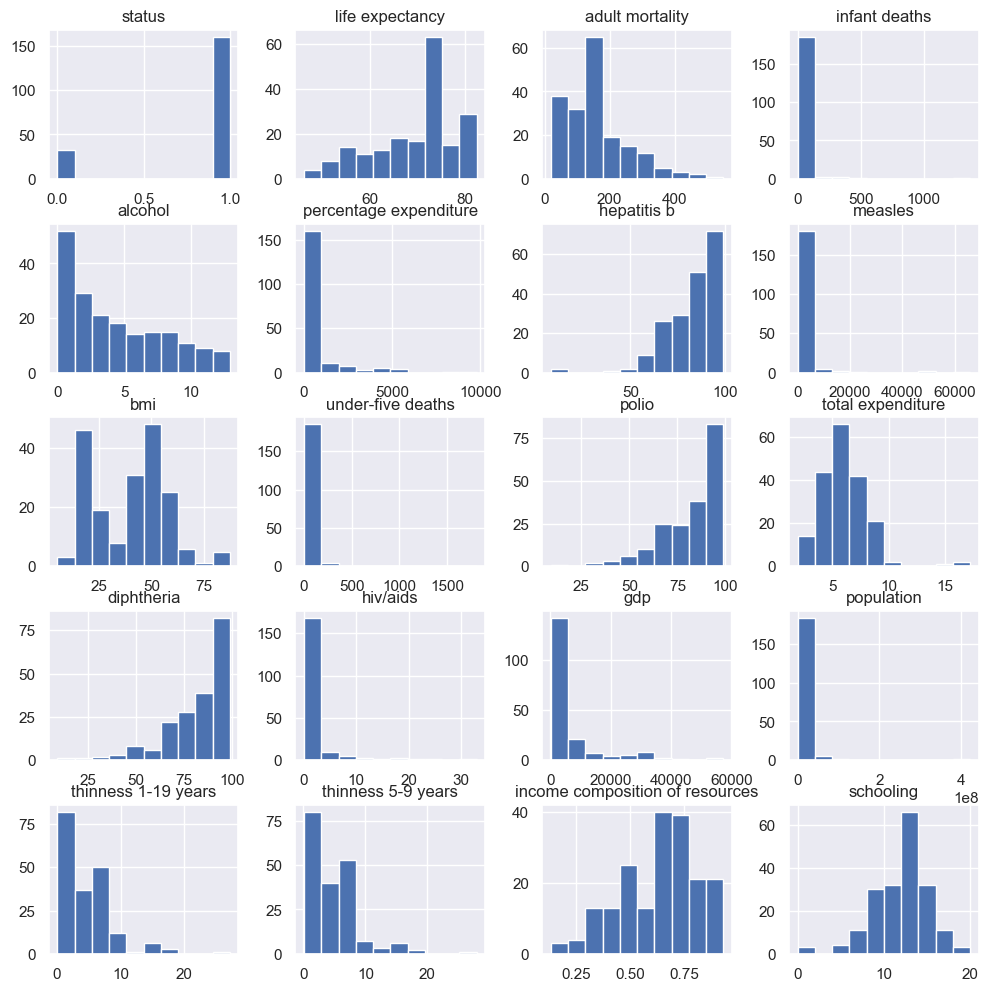

In [ ]:
who.hist(figsize=(12,12))

# Visualizing difference in development (Classification)

In [ ]:
development = who['status'].value_counts()

In [ ]:
development

1.0    160
0.0     32
Name: status, dtype: int64

Text(0, 0.5, 'number of countries')

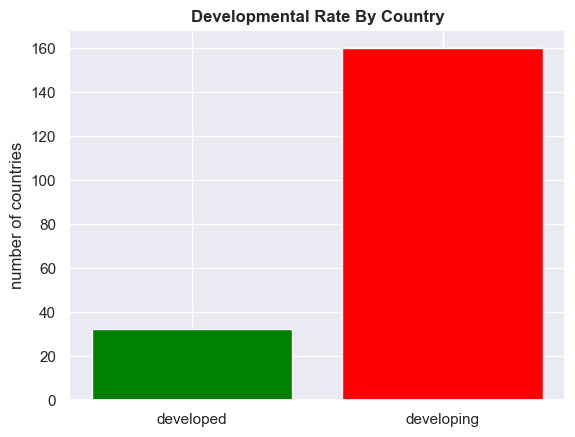

In [ ]:
plt.bar(development.index, development, color=('red','green'))
plt.title('Developmental Rate By Country', fontweight='bold')
plt.xticks(ticks=[0,1],labels=["developed","developing"])
plt.ylabel("number of countries")

# Visualizing difference in life expectancy

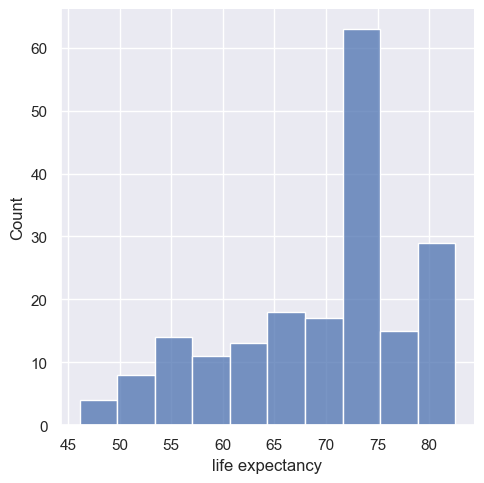

In [ ]:
sns.displot(who['life expectancy'])

In [ ]:
lebyc = who.groupby(['country','life expectancy', 'status']).count().reset_index()


In [ ]:
type(lebyc)

pandas.core.frame.DataFrame

In [ ]:
lebyc = lebyc.sort_values(by=['life expectancy'])
#dft['Product'] = dft['Product'].astype(str)

In [ ]:
sns.set_palette('RdYlGn')
palette_status = {1: "C0", 0: "C5"}

Text(56.42824375494341, 0.5, 'Life Expectancy')

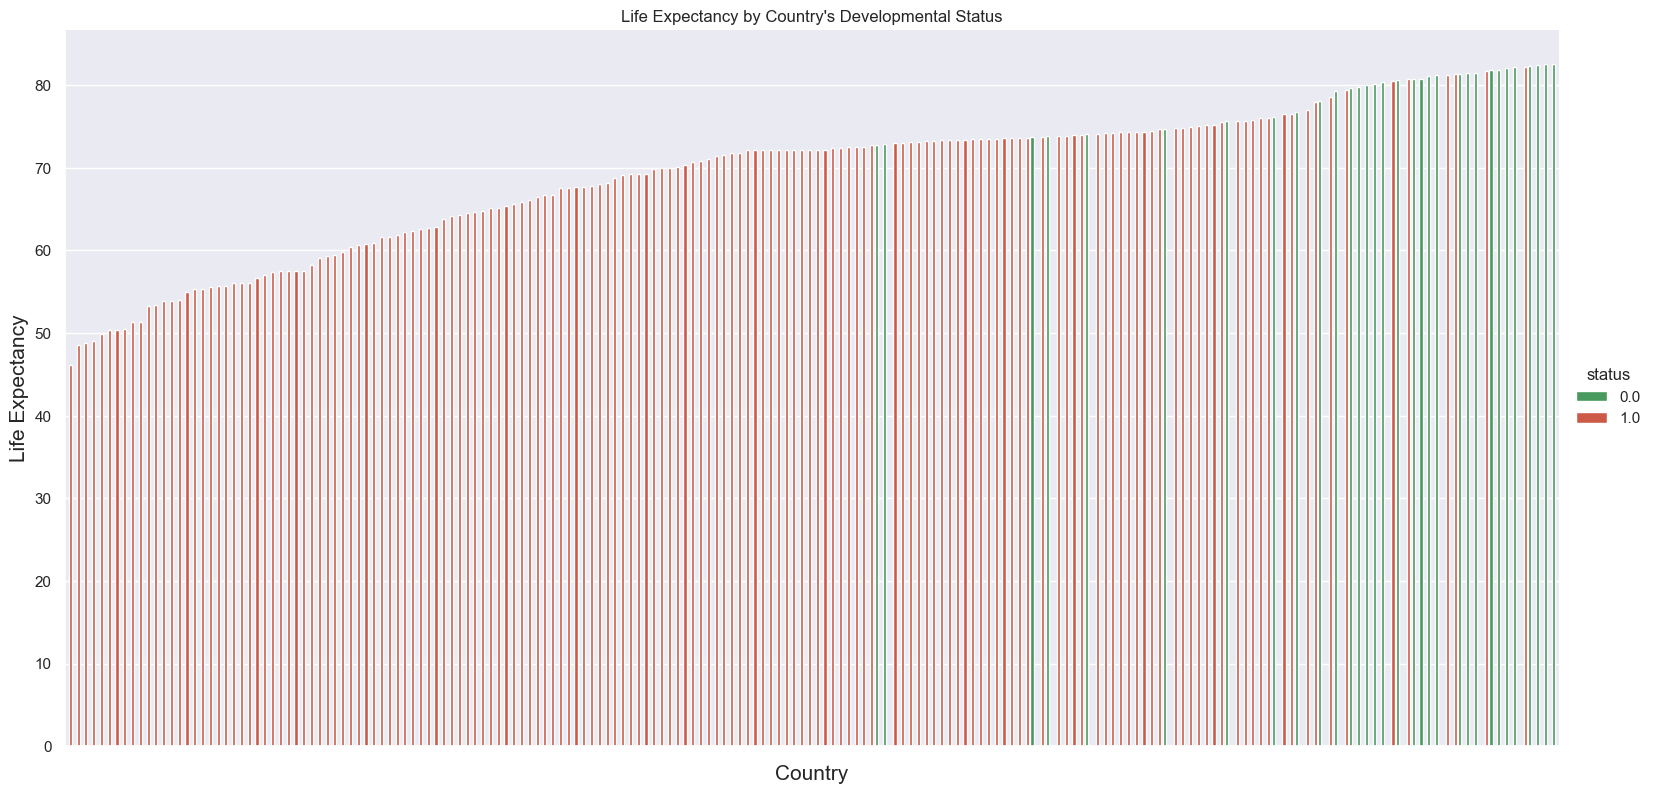

In [ ]:
f1 = sns.catplot(x= 'country', y = 'life expectancy', hue = 'status', data = lebyc, kind='bar', palette=palette_status, height=8.0, aspect=88.7/44.27)
f1.set(xticklabels=[])
f1.set(title="Life Expectancy by Country's Developmental Status")
f1.set(xlabel=None)
plt.xlabel('Country', fontsize=15)
plt.ylabel('Life Expectancy', fontsize=15)

In [ ]:
who.columns

Index(['country', 'status', 'life expectancy', 'adult mortality',
       'infant deaths', 'alcohol', 'percentage expenditure', 'hepatitis b',
       'measles', 'bmi', 'under-five deaths', 'polio', 'total expenditure',
       'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness 1-19 years',
       'thinness 5-9 years', 'income composition of resources', 'schooling'],
      dtype='object')

# Visualizing difference in life expectancy by gdp

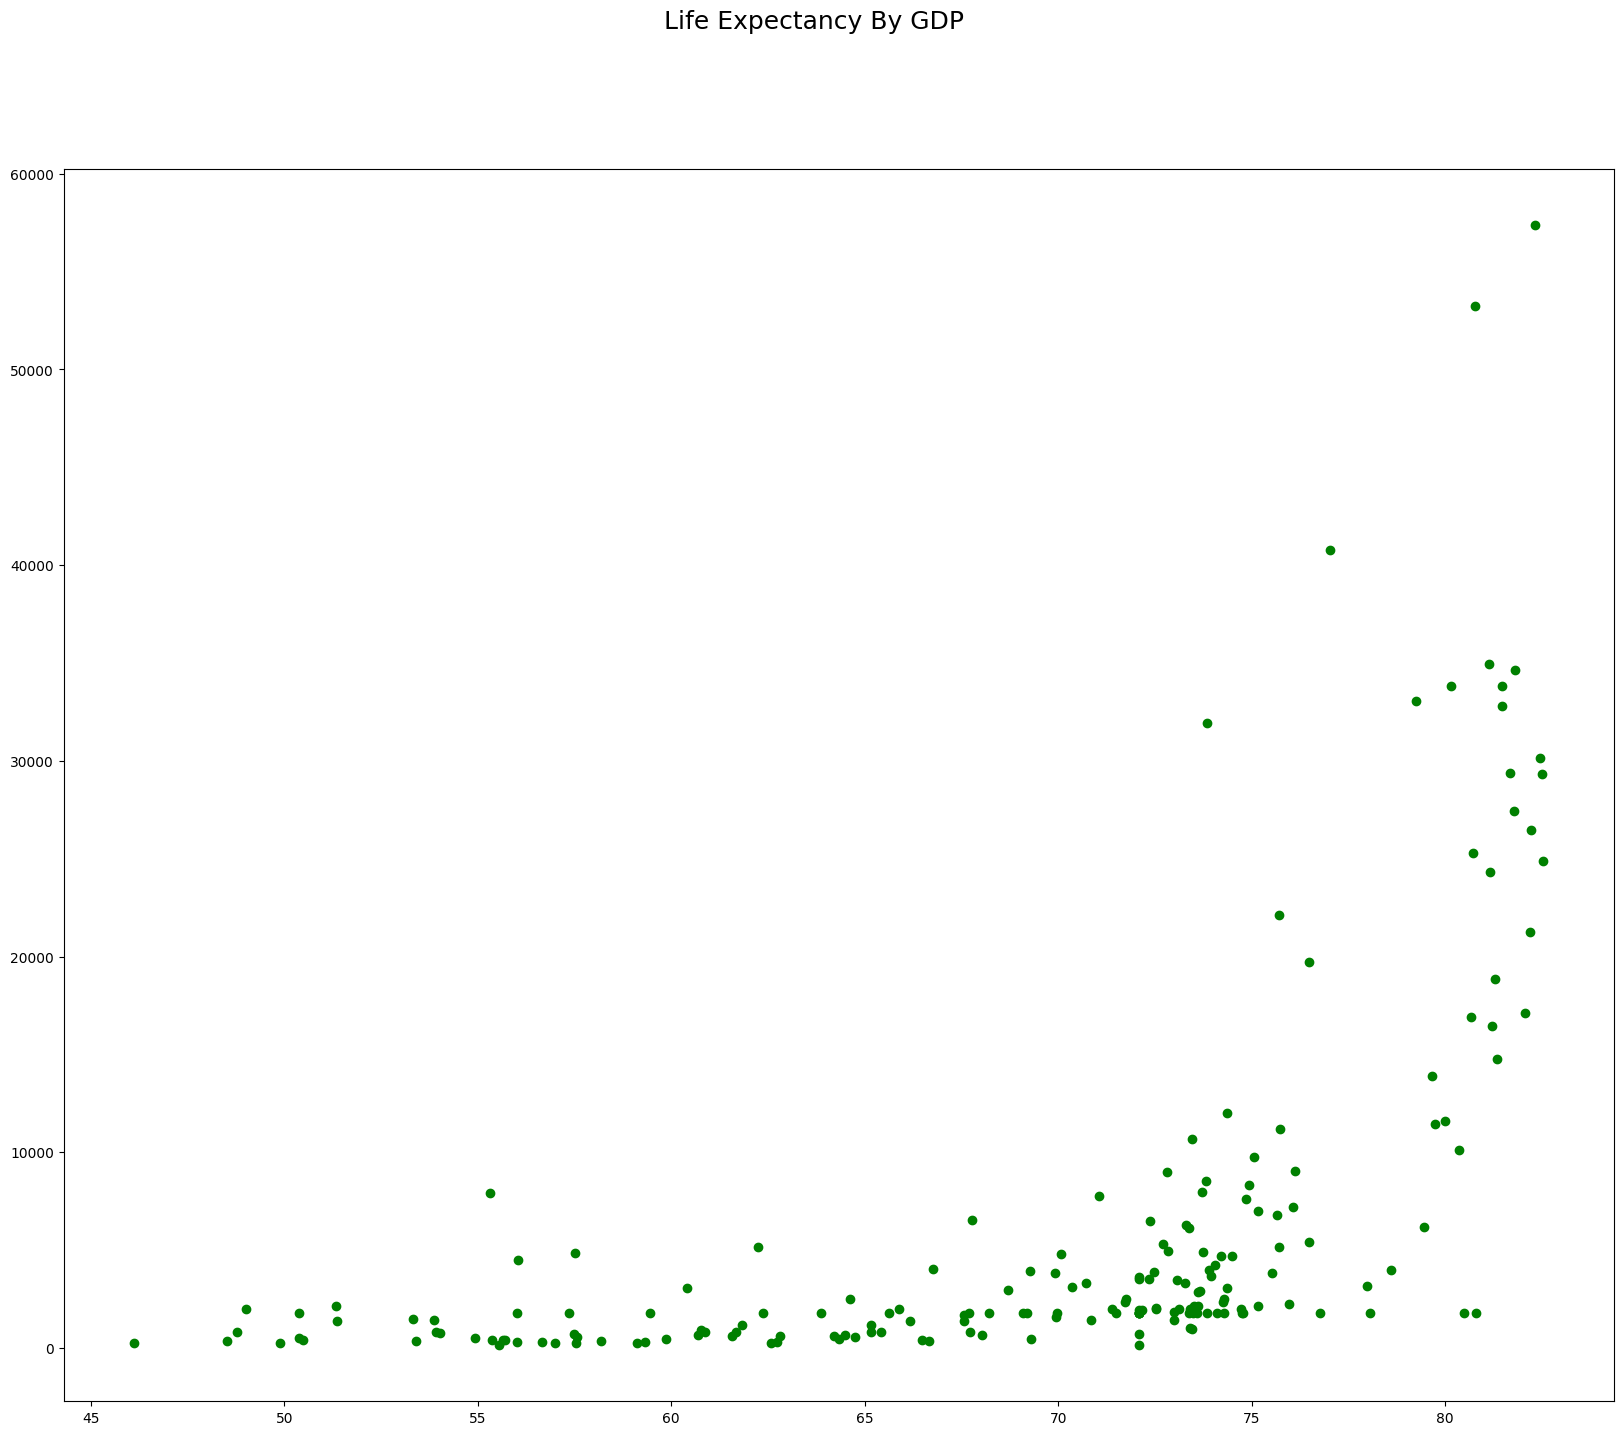

In [ ]:
fig, axes = plt.subplots(1,figsize = (20,16))

fig.suptitle('Life Expectancy By GDP', fontsize=18)

axes.scatter(who['life expectancy'], who['gdp'], c='green', label='y = 2^x')


In [ ]:
who.columns

Index(['country', 'status', 'life expectancy', 'adult mortality',
       'infant deaths', 'alcohol', 'percentage expenditure', 'hepatitis b',
       'measles', 'bmi', 'under-five deaths', 'polio', 'total expenditure',
       'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness 1-19 years',
       'thinness 5-9 years', 'income composition of resources', 'schooling'],
      dtype='object')

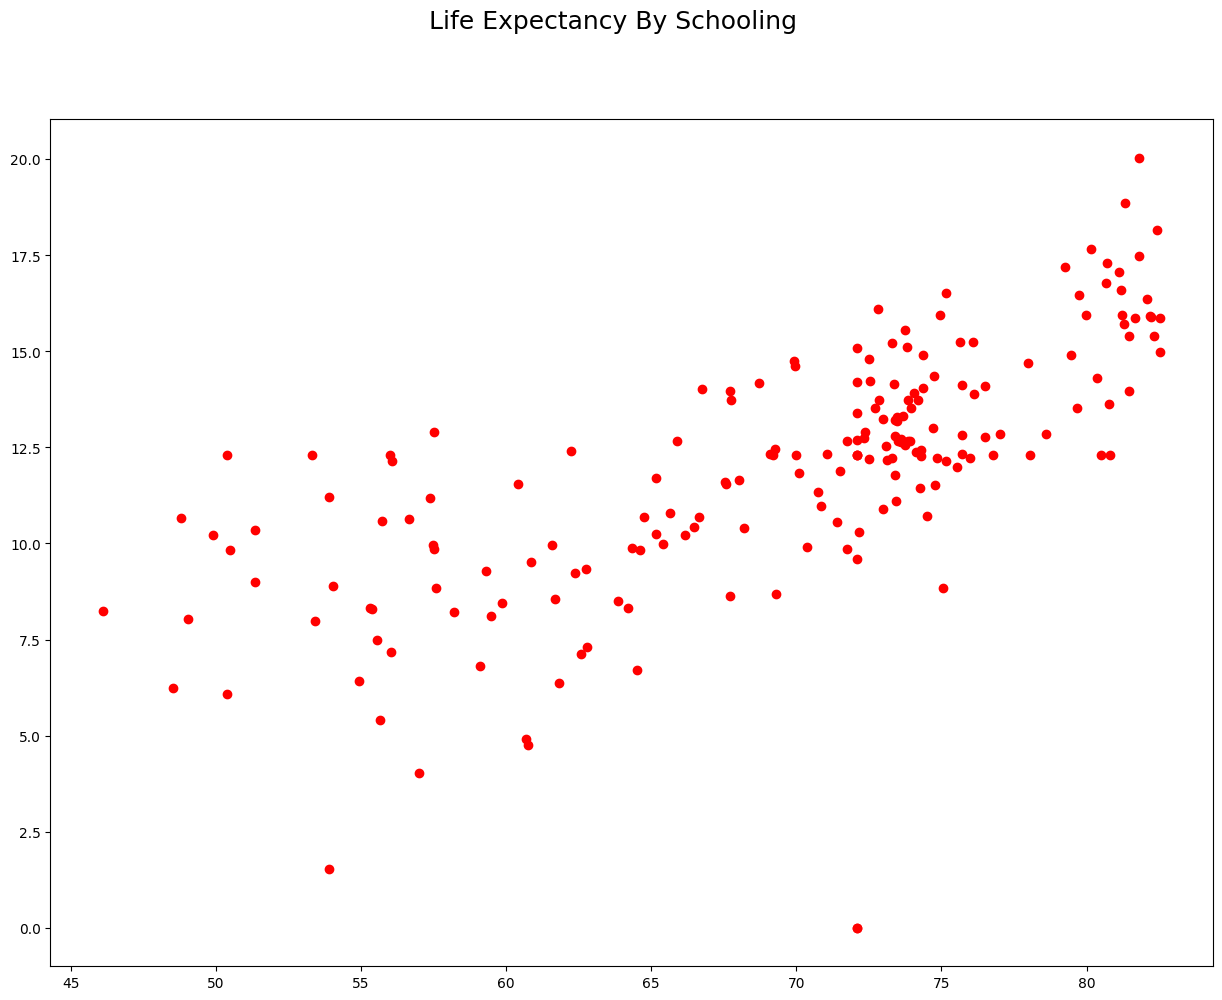

In [ ]:
fig, axes = plt.subplots(1,figsize = (15,11))

fig.suptitle('Life Expectancy By Schooling', fontsize=18)

axes.scatter(who['life expectancy'], who['schooling'], c='red', label='y = 2^x')


# Checking skewness of dataframe

In [ ]:
who.skew(axis = 0, skipna = False)

status                             -1.802971
life expectancy                    -0.663830
adult mortality                     1.233604
infant deaths                       9.600424
alcohol                             0.589698
percentage expenditure              3.300749
hepatitis b                        -1.821565
measles                             6.486769
bmi                                 0.079719
under-five deaths                   9.244603
polio                              -1.365041
total expenditure                   1.862400
diphtheria                         -1.473511
hiv/aids                            4.287512
gdp                                 2.575116
population                         10.163693
thinness 1-19 years                 1.751115
thinness 5-9 years                  1.807789
income composition of resources    -0.539370
schooling                          -0.732971
dtype: float64

# Building correlation heatmap

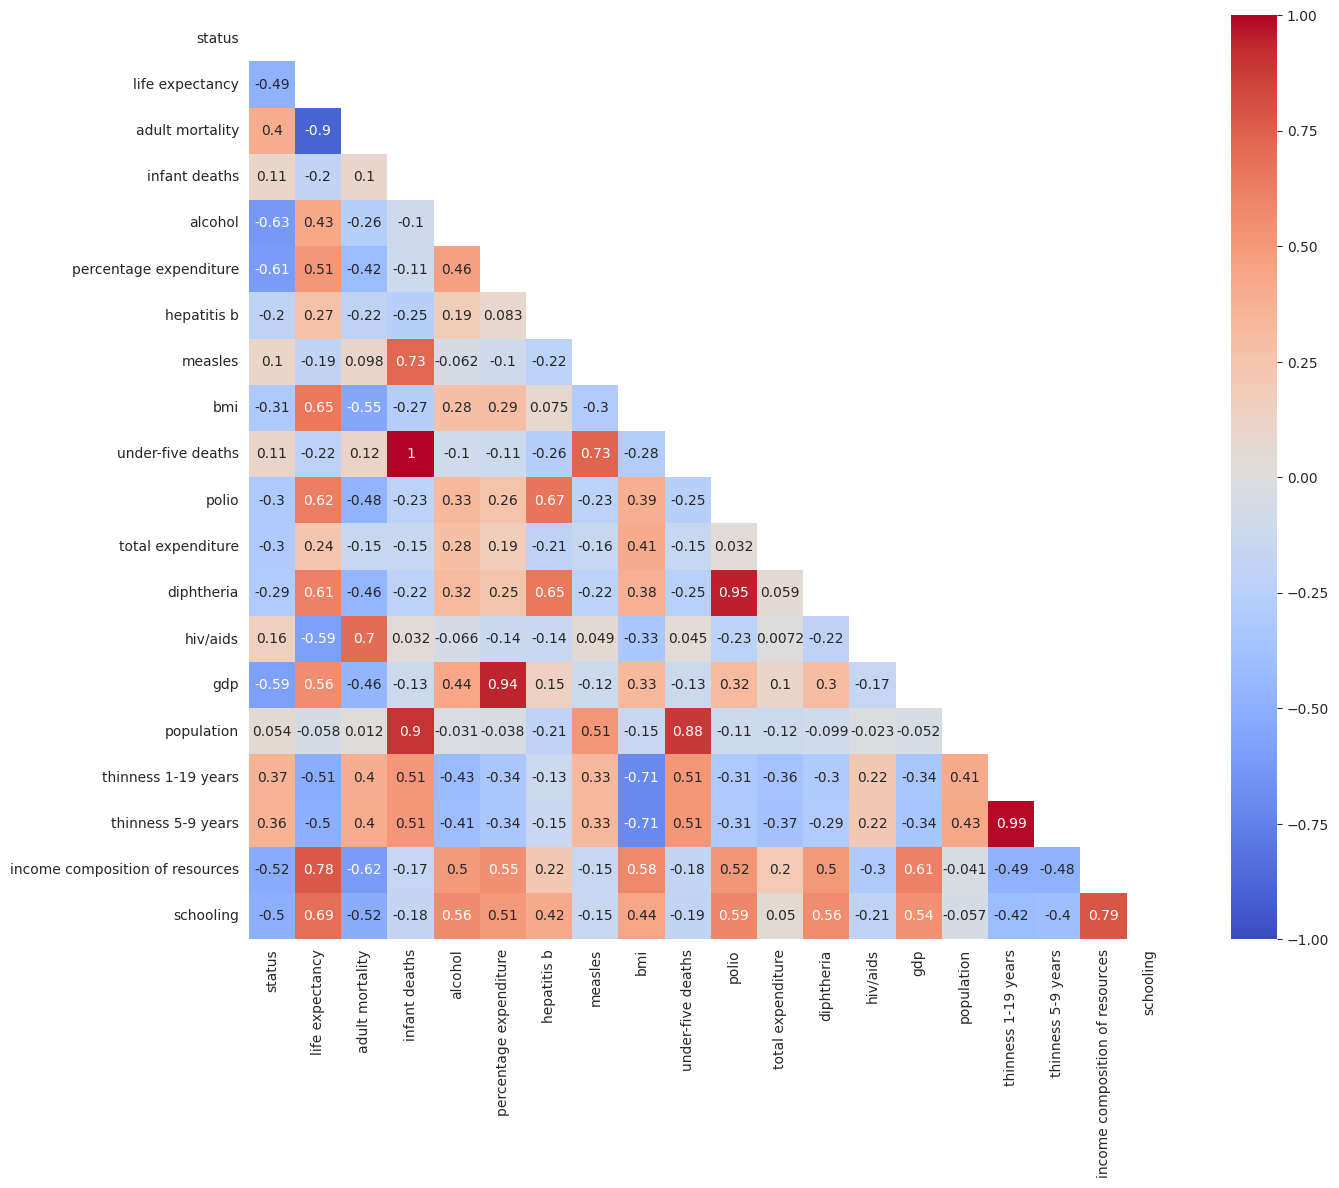

In [ ]:
corr = who.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(15, 12))
    ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)

# Identifying highly correlated columns

In [ ]:
corr_matrix=who.corr().abs()
upper_triangle=corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(bool))
[column for column in upper_triangle.columns if any(upper_triangle[column] >= 0.80)]



['adult mortality',
 'under-five deaths',
 'diphtheria',
 'gdp',
 'population',
 'thinness 5-9 years']

# Dropping highly correlated columns

In [ ]:
who.drop(['adult mortality', 'under-five deaths', 'diphtheria', 'gdp', 'population', 'thinness 5-9 years'],axis=1,inplace=True)

# Saving cleaned df into new csv file for further analysis

In [ ]:
len(who.columns)

15

In [ ]:
who.to_csv('who.csv')

In [ ]:
check = pd.read_csv('who.csv')

In [ ]:
type(check)

pandas.core.frame.DataFrame

In [ ]:
len(check.columns)

16

In [ ]:
check.head()

,Unnamed: 0,country,status,life expectancy,infant deaths,alcohol,percentage expenditure,hepatitis b,measles,bmi,polio,total expenditure,hiv/aids,thinness 1-19 years,income composition of resources,schooling
0,0,Afghanistan,1.0,58.19375,78.2500,0.014375,34.960110,64.5625,2362.2500,15.51875,48.3750,8.252500,0.10000,16.58125,0.415375,8.21250
1,1,Albania,1.0,75.15625,0.6875,4.848750,193.259091,98.0000,53.3750,49.06875,98.1250,5.945625,0.10000,1.61875,0.709875,12.13750
2,2,Algeria,1.0,73.61875,20.3125,0.615938,236.185241,81.5000,1943.8750,48.74375,91.7500,4.675937,0.10000,6.09375,0.694875,12.71250
3,3,Angola,1.0,49.01875,83.7500,5.616562,102.100268,79.7500,3561.3125,18.01875,46.1250,4.034063,2.36875,6.19375,0.458375,8.04375
4,4,Antigua and Barbuda,1.0,75.05625,0.0000,7.687188,1001.585226,97.8750,0.0000,38.42500,96.9375,4.851562,0.12500,3.42500,0.488625,8.84375
